In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta.values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [3]:
#np.median(y)

In [4]:
#2 is near median of y
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 0 #success
    else:
        y[i] = 1 #failure


In [5]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]
#reg = LinearRegression()
# Train the model using the training sets
#reg.fit(X_train, y_train)
# Make predictions using the testing set
#y_pred = reg.predict(X_test)
#reg.coef_
# reg.intercept_ 
#reg.predict(np.array([[3, 5]]))b



In [6]:
#lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
#lr.fit(X_train,y_train)

In [7]:
"""
Penalty param
"""
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  

In [8]:
lrl1 = LogisticRegression(random_state=0,penalty ='l1')
lrl1.fit(X_train,y_train)
y_pred_l1 = lrl1.predict(X_test)
scoresl1 = cross_val_score(lrl1, X_test, y_test, cv=10).mean()
rl1 = recall_score(y_test, y_pred_l1)  
pl1 = precision_score(y_test, y_pred_l1)  
f1l1 = f1_score(y_test, y_pred_l1) 

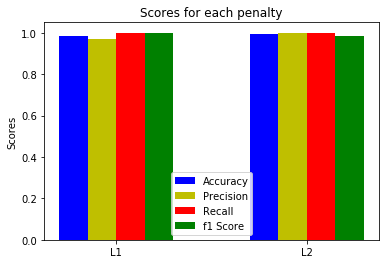

In [14]:
N = 2

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scoresl1,scores]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [pl1,p]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [rl1,r]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1,f1l1]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('L1', 'L2'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

In [ ]:
scores - scoresl1

L2 is slightly better  0.91% better

In [15]:
"""
Solvers
"""
# lr = LogisticRegression(random_state=0,solver='liblinear') #default
# lr.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# scores = cross_val_score(lrl1, X_test, y_test, cv=10).mean()
# r = recall_score(y_test, y_pred_l1)  
# p = precision_score(y_test, y_pred_l1)  
# f1 = f1_score(y_test, y_pred_l1) 

'\nSolvers\n'

In [16]:
lrnt = LogisticRegression(random_state=0,solver='newton-cg')
lrnt.fit(X_train,y_train)
y_pred_nt = lrnt.predict(X_test)
scores_nt = cross_val_score(lrnt, X_test, y_test, cv=10).mean()
r_nt = recall_score(y_test, y_pred_nt)  
p_nt = precision_score(y_test, y_pred_nt)  
f1_nt = f1_score(y_test, y_pred_nt) 

C:\Users\woosung\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

In [17]:
lr_lbfgs = LogisticRegression(random_state=0,solver='lbfgs') 
lr_lbfgs.fit(X_train,y_train)
y_pred_lbfgs = lr_lbfgs.predict(X_test)
scores_lbfgs = cross_val_score(lr_lbfgs, X_test, y_test, cv=10).mean()
r_lbfgs = recall_score(y_test, y_pred_lbfgs)  
p_lbfgs = precision_score(y_test, y_pred_lbfgs)  
f1_lbfgs = f1_score(y_test, y_pred_lbfgs) 

In [18]:
lr_sag = LogisticRegression(random_state=0,solver='sag',max_iter = 10000)
lr_sag.fit(X_train,y_train)
y_pred_sag = lr_sag.predict(X_test)
scores_sag = cross_val_score(lr_sag, X_test, y_test, cv=10).mean()
r_sag = recall_score(y_test, y_pred_sag)  
p_sag = precision_score(y_test, y_pred_sag)  
f1_sag = f1_score(y_test, y_pred_sag) 

In [19]:
lr_saga = LogisticRegression(random_state=0,solver='saga', max_iter = 10000)
lr_saga.fit(X_train,y_train)
y_pred_saga = lr_saga.predict(X_test)
scores_saga = cross_val_score(lr_saga, X_test, y_test, cv=10).mean()
r_saga = recall_score(y_test, y_pred_saga)  
p_saga = precision_score(y_test, y_pred_saga)  
f1_saga = f1_score(y_test, y_pred_saga) 

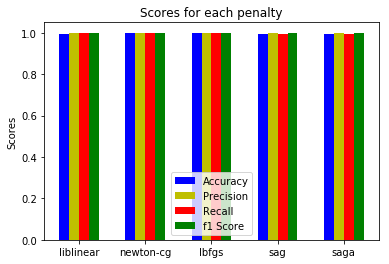

In [21]:
N = 5

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores,scores_nt,scores_lbfgs,scores_sag,scores_saga]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p,p_nt,p_lbfgs,p_sag,p_saga]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r,r_nt,r_lbfgs,r_sag,r_saga]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1,f1_nt,f1_lbfgs,f1_sag,f1_saga]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')


ax.set_ylabel('Scores')
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('liblinear','newton-cg','lbfgs','sag','saga'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

neuton-cg and lbfgs are best performing one 0.9965778474399164

will go with lbfgs, with more max-iter on newton-cg, accuracy decreased on it

In [22]:
#multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}, default: ‘ovr’

In [23]:
lr = LogisticRegression(random_state=0,solver ='lbfgs') # multi class = ovr
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  

In [24]:
lr_mn = LogisticRegression(random_state=0, solver ='lbfgs', multi_class = 'multinomial')
lr_mn.fit(X_train,y_train)
y_pred_mn = lr_mn.predict(X_test)
scores_mn = cross_val_score(lr_mn, X_test, y_test, cv=10).mean()
r_mn = recall_score(y_test, y_pred_mn)  
p_mn = precision_score(y_test, y_pred_mn)  
f1_mn = f1_score(y_test, y_pred_mn) 

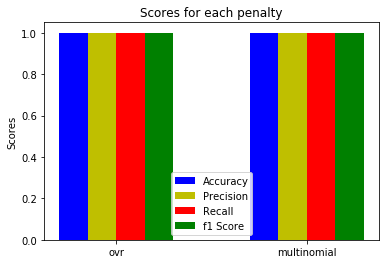

In [26]:
N = 2

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores,scores_mn]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p,p_mn]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r,r_mn]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1,f1_mn]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('ovr','multinomial'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

no difference between 2, will go with multinomial because "auto" multi class multinomial first.

In [ ]:
"""
Tolerance 
"""

In [27]:
lr = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial') #default 1e-4
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  

In [28]:
lr_t3 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', tol= 1e-3) #default 1e-4
lr_t3.fit(X_train,y_train) 
y_pred_t3 = lr_t3.predict(X_test)
scores_t3 = cross_val_score(lr_t3, X_test, y_test, cv=10).mean()
r_t3 =recall_score(y_test, y_pred_t3)  
p_t3 =precision_score(y_test, y_pred_t3)  
f1_t3 =f1_score(y_test, y_pred_t3)  

In [29]:
lr_t5 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', tol= 1e-5) #default 1e-4
lr_t5.fit(X_train,y_train) 
y_pred_t5 = lr_t5.predict(X_test)
scores_t5 = cross_val_score(lr_t5, X_test, y_test, cv=10).mean()
r_t5 =recall_score(y_test, y_pred_t5)  
p_t5 =precision_score(y_test, y_pred_t5)  
f1_t5 =f1_score(y_test, y_pred_t5)  

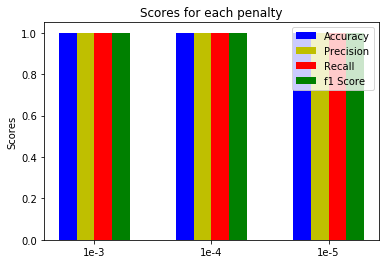

In [30]:
N =3

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_t3,scores,scores_t5]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_t3,p,p_t5]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_t3,r,r_t5]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_t3,f1,f1_t5]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('1e-3','1e-4','1e-5'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

no difference, we will go with 1e-4 which is a default

In [31]:
"""
C
"""
lr = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial') #default 1
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  


In [32]:
lr_c8 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', C = 0.8) #default 1
lr_c8.fit(X_train,y_train) 
y_pred_c8 = lr_c8.predict(X_test)
scores_c8 = cross_val_score(lr_c8, X_test, y_test, cv=10).mean()
r_c8 =recall_score(y_test, y_pred_c8)  
p_c8 =precision_score(y_test, y_pred_c8)  
f1_c8 =f1_score(y_test, y_pred_c8)  


In [33]:
lr_c6 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial',C = 0.6) #default 1
lr_c6.fit(X_train,y_train) 
y_pred_c6 = lr_c6.predict(X_test)
scores_c6 = cross_val_score(lr_c6, X_test, y_test, cv=10).mean()
r_c6 =recall_score(y_test, y_pred_c6)  
p_c6 =precision_score(y_test, y_pred_c6)  
f1_c6 =f1_score(y_test, y_pred_c6)  


In [34]:
lr_c4 = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', C= 0.4) #default 1
lr_c4.fit(X_train,y_train) 
y_pred_c4 = lr_c4.predict(X_test)
scores_c4 = cross_val_score(lr_c4, X_test, y_test, cv=10).mean()
r_c4 =recall_score(y_test, y_pred_c4)  
p_c4 =precision_score(y_test, y_pred_c4)  
f1_c4 =f1_score(y_test, y_pred_c4)  


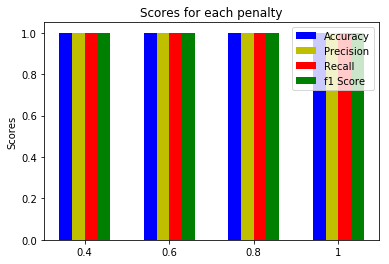

In [35]:
N =4

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_c4,scores_c6,scores_c8,scores]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_c4,p_c6,p_c8,p]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_c4,r_c6,r_c8,r]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_c4,f1_c6,f1_c8,f1]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('0.4','0.6','0.8','1'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

C = 0.8 has the highest accuracy


In [36]:
"""
Final Model
"""
lr = LogisticRegression(random_state=0,solver ='lbfgs', multi_class = 'multinomial', C = 0.8) #default 1
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  


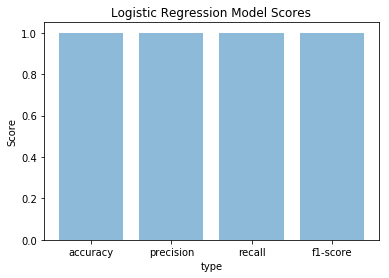

In [37]:
objects = scores,p,r,f1
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xlabel('type')
plt.xticks([0, 1, 2, 3], ["accuracy", "precision", "recall", "f1-score"])
plt.ylabel('Score')
plt.title('Logistic Regression Model Scores')
 
plt.show()

In [38]:
objects  #["accuracy", "precision", "recall", "f1-score"])

(0.9977272727272727, 0.9977477477477478, 1.0, 0.9988726042841037)

Feature ranking:
1. feature 1 (0.677379)
2. feature 2 (0.338681)
3. feature 5 (0.198397)
4. feature 17 (0.023141)
5. feature 8 (0.020024)
6. feature 13 (0.017684)
7. feature 3 (0.017451)
8. feature 4 (0.012737)
9. feature 14 (0.012280)
10. feature 6 (0.007828)
11. feature 7 (0.007005)
12. feature 15 (0.003423)
13. feature 9 (0.002848)
14. feature 10 (0.000781)
15. feature 12 (0.000318)
16. feature 0 (0.000107)
17. feature 16 (0.000001)
18. feature 11 (0.000000)


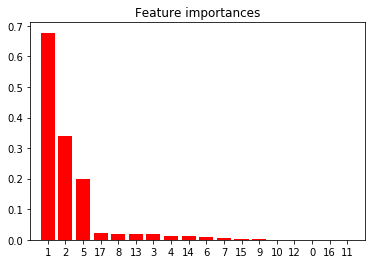

In [39]:
weights = lr.coef_[0]
importances = np.abs(weights)

indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

'budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december'

In [40]:
print(weights)
print(sorted(weights)[::-1])
print(np.argsort(weights)[::-1])


[-1.06525028e-04  6.77379399e-01 -3.38681162e-01  1.74513073e-02
  1.27373110e-02 -1.98397025e-01  7.82802648e-03 -7.00479601e-03
 -2.00241494e-02  2.84828601e-03 -7.81083701e-04 -7.10320199e-09
  3.18387021e-04  1.76835001e-02  1.22797897e-02  3.42288680e-03
  7.85076794e-07 -2.31409441e-02]
[0.6773793990909025, 0.01768350012056071, 0.01745130732534382, 0.012737311039274436, 0.01227978970508243, 0.007828026476505903, 0.0034228868035527027, 0.0028482860148820823, 0.0003183870205885638, 7.850767938717456e-07, -7.103201987520392e-09, -0.00010652502801472384, -0.0007810837013224361, -0.007004796005973052, -0.02002414937800889, -0.02314094405391629, -0.19839702542192275, -0.3386811615627606]
[ 1 13  3  4 14  6 15  9 12 16 11  0 10  7  8 17  5  2]


positive correlation: 1  Positive correlation below 0.0 coef: 4  3 13 14  6 15  9 12  0 16 

Neg correlation: 2  Neg correlation below 0.0 coef: 11 10  7  8 17  5